In [1]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [3]:
# Load the dataset
dataset_path = 'health_fitness_dataset.csv'
data = pd.read_csv(dataset_path)

In [4]:
print(data)

        participant_id        date  age gender  height_cm  weight_kg  \
0                    1  2024-01-01   56      F      165.3       53.7   
1                    1  2024-01-04   56      F      165.3       53.9   
2                    1  2024-01-05   56      F      165.3       54.2   
3                    1  2024-01-07   56      F      165.3       54.4   
4                    1  2024-01-09   56      F      165.3       54.7   
...                ...         ...  ...    ...        ...        ...   
687696            3000  2024-12-19   38      F      165.7      112.9   
687697            3000  2024-12-20   38      F      165.7      113.1   
687698            3000  2024-12-21   38      F      165.7      113.4   
687699            3000  2024-12-22   38      F      165.7      113.6   
687700            3000  2024-12-23   38      F      165.7      113.9   

          activity_type  duration_minutes intensity  calories_burned  ...  \
0               Dancing                41       Low       

In [5]:
# Check for missing values
print("\nMissing Values:\n", data.isnull().sum())


Missing Values:
 participant_id                   0
date                             0
age                              0
gender                           0
height_cm                        0
weight_kg                        0
activity_type                    0
duration_minutes                 0
intensity                        0
calories_burned                  0
avg_heart_rate                   0
hours_sleep                      0
stress_level                     0
daily_steps                      0
hydration_level                  0
bmi                              0
resting_heart_rate               0
blood_pressure_systolic          0
blood_pressure_diastolic         0
health_condition            490275
smoking_status                   0
fitness_level                    0
dtype: int64


In [6]:
# Select relevant columns for the task
selected_columns = [
    'age', 'gender', 'height_cm', 'weight_kg', 'activity_type', 'intensity',
    'duration_minutes', 'daily_steps', 'hydration_level', 'bmi', 'health_condition',
    'calories_burned', 'fitness_level', 'stress_level', 'resting_heart_rate', 'hours_sleep'
]
data = data[selected_columns]

In [7]:
# Handle missing values (e.g., fill with mean/median or drop rows)
data = data.dropna()  # Drop rows with missing values

In [8]:
# Check for missing values
print("\nMissing Values:\n", data.isnull().sum())


Missing Values:
 age                   0
gender                0
height_cm             0
weight_kg             0
activity_type         0
intensity             0
duration_minutes      0
daily_steps           0
hydration_level       0
bmi                   0
health_condition      0
calories_burned       0
fitness_level         0
stress_level          0
resting_heart_rate    0
hours_sleep           0
dtype: int64


In [9]:
# Encode categorical variables
label_encoders = {}
for col in ['gender', 'activity_type', 'intensity', 'health_condition']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

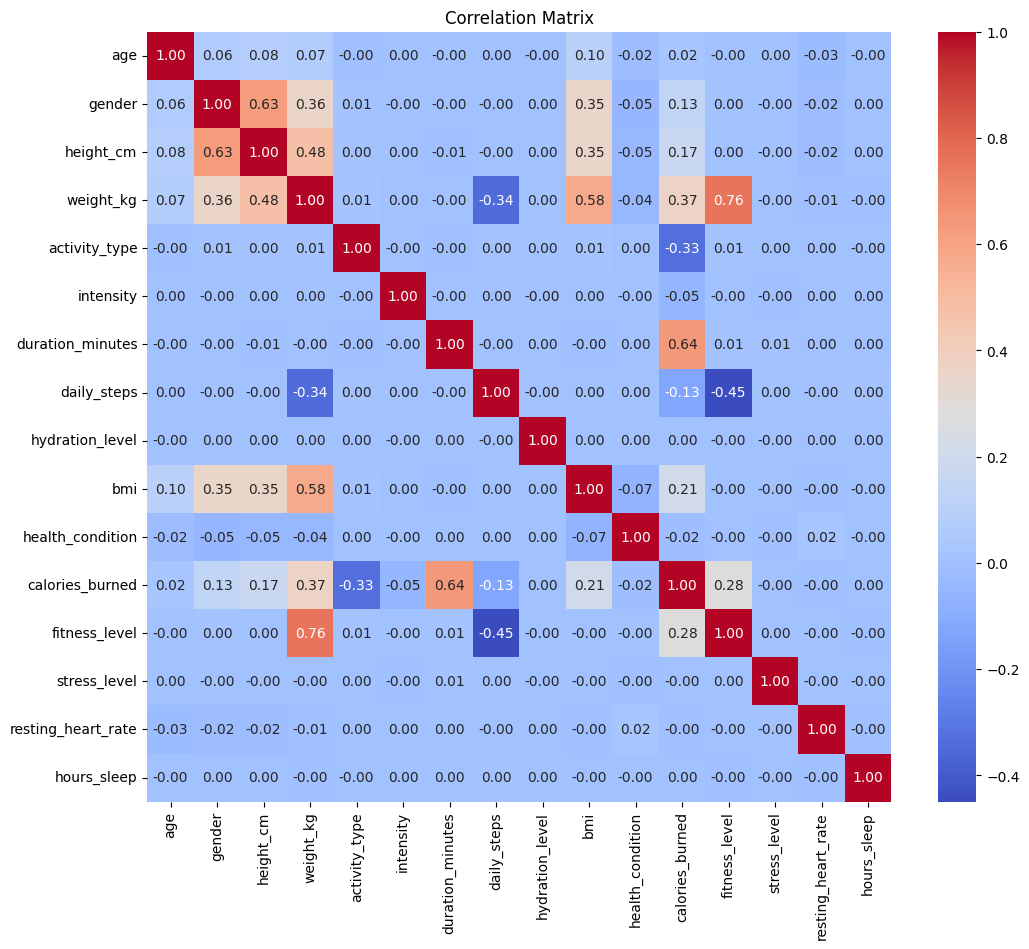

In [10]:
# Correlation matrix to identify important features
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [11]:
# Define features and target
X = data[['age', 'gender', 'height_cm', 'weight_kg', 'activity_type', 'intensity',
          'duration_minutes', 'daily_steps', 'hydration_level', 'bmi', 'health_condition']]  # Features
y = data[['calories_burned', 'fitness_level', 'stress_level', 'resting_heart_rate', 'hours_sleep']]  # Targets

In [12]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# Train a Random Forest Regressor for multi-output regression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

model = MultiOutputRegressor(RandomForestRegressor(random_state=42))
model.fit(X_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

In [15]:
# Make predictions
y_pred = model.predict(X_test)

In [16]:
# Evaluate the model
from sklearn.metrics import mean_squared_error

for i, target in enumerate(y.columns):
    mse = mean_squared_error(y_test.iloc[:, i], y_pred[:, i])
    print(f"Mean Squared Error for {target}: {mse}")

Mean Squared Error for calories_burned: 0.058165532087321954
Mean Squared Error for fitness_level: 0.02842633478574685
Mean Squared Error for stress_level: 7.942747991693257
Mean Squared Error for resting_heart_rate: 0.005057041888264244
Mean Squared Error for hours_sleep: 0.9722321769741173


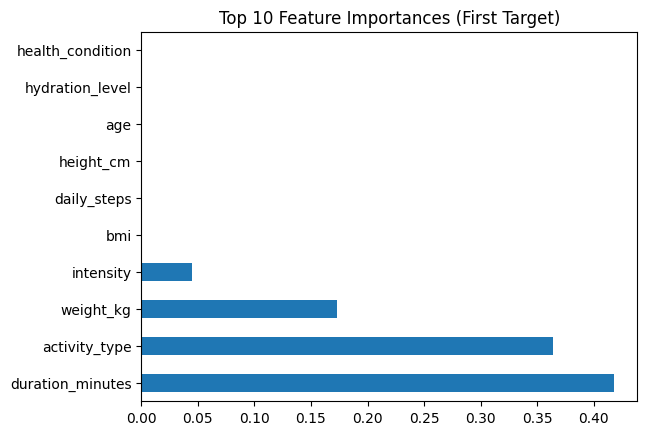

In [17]:
# Feature importance (for the first target variable as an example)
feature_importances = pd.Series(model.estimators_[0].feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances (First Target)')
plt.show()